In [266]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from langdetect import detect

# sns.set_theme(style="white")
sns.set_style("whitegrid")

In [267]:
jobs = pd.read_csv('jobs_clean.csv')

In [268]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   job_title_orig   488 non-null    object 
 1   job_description  488 non-null    object 
 2   rating           488 non-null    float64
 3   company_name     488 non-null    object 
 4   location         488 non-null    object 
 5   size_orig        488 non-null    object 
 6   founded          488 non-null    int64  
 7   industry         488 non-null    object 
 8   sector           488 non-null    object 
 9   revenue_orig     488 non-null    object 
 10  job_title        483 non-null    object 
 11  title_simple     488 non-null    object 
 12  seniority        488 non-null    object 
 13  salary           408 non-null    float64
 14  company          488 non-null    object 
 15  revenue          488 non-null    int64  
 16  size             488 non-null    float64
 17  python          

In [269]:
jobs.describe()

,rating,founded,salary,revenue,size,python,sql,spark,excel,tableau,hadoop,spss,r,statistics,company_age
count,488.000000,488.000000,408.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000,488.000000
mean,2.132787,1047.551230,44001.666667,3.112705,2.786885,0.358607,0.418033,0.118852,0.344262,0.125000,0.102459,0.040984,0.049180,0.329918,31.887295
std,2.123756,979.688559,12513.106626,3.724827,3.005756,0.480084,0.493742,0.323947,0.475615,0.331058,0.303562,0.198456,0.216466,0.470666,50.336013
min,-1.000000,-1.000000,14.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,-1.000000,-1.000000,36000.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,3.000000,1847.500000,45398.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,3.900000,1983.000000,50000.000000,6.000000,6.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,37.000000
max,5.000000,2018.000000,70000.000000,10.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,201.000000


## Pair plots of all continuous columns

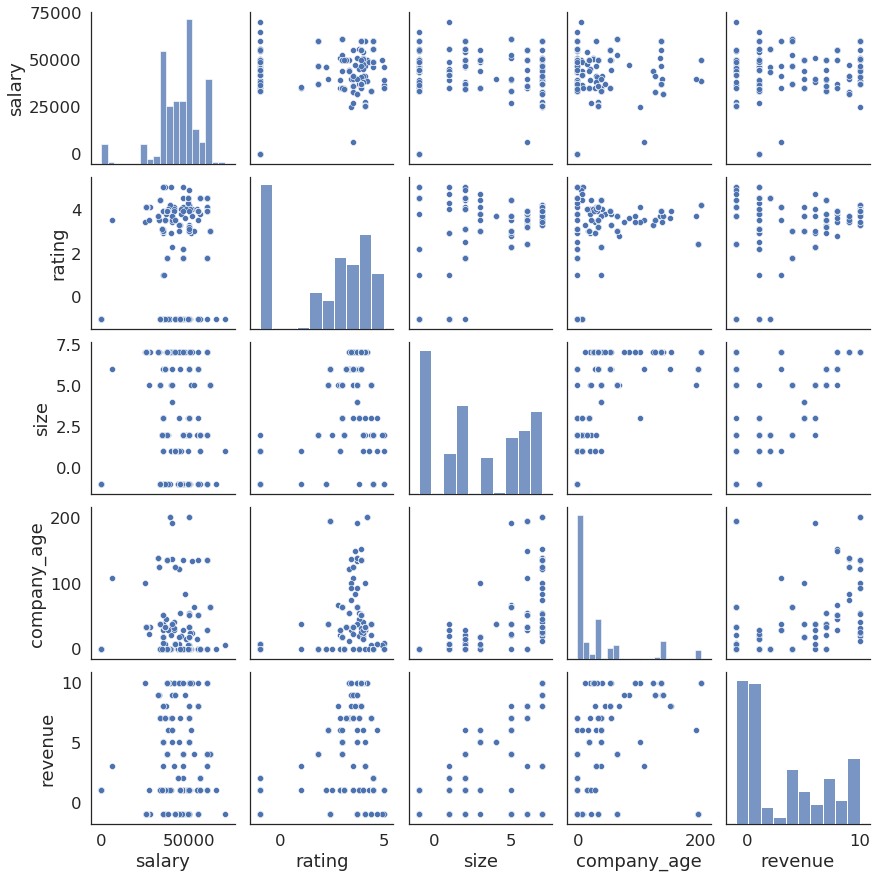

In [270]:
continuous_cols = [ 'salary', 'rating', 'size', 'company_age', 'revenue']
sns.set(style="white", font_scale=1.5)
sns.pairplot(jobs[continuous_cols])

## Correlations of continuous columns

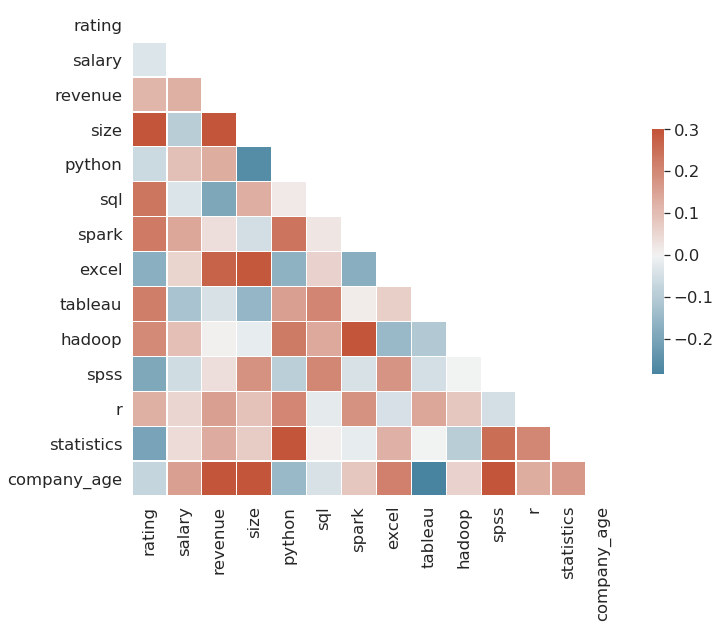

In [271]:
#seaborn==0.11.0 Select numeric columns and compute the correlation matrix
corr = jobs.select_dtypes('number').replace(-1, np.nan).drop(['founded'], axis=1).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [272]:
categoric_cols = ['company', 'location', 'industry', 'sector', 'title_simple', 'seniority']
jobs_categoric = jobs[categoric_cols]
jobs_categoric.shape

(488, 6)

In [273]:
# plots = jobs_categoric.shape[1]
# cols = 3
# rows = int(np.ceil(plots / cols))
# fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(14,10), squeeze=True)

# fig.delaxes(axes[2,2])
# fig.delaxes(axes[2,1])
# axes = axes.ravel()


# for i, ax in enumerate(axes):
#     print(i)
#     col = jobs_categoric.columns[i]
#     x_vals = jobs_categoric[col].value_counts().head(10).index
#     y_vals = jobs_categoric[col].value_counts().head(10)
#     sns.barplot(x=x_vals, y=y_vals, ax=ax)
    


# # for i, col in enumerate(jobs_categoric.columns):
# #     x_vals = jobs_categoric[col].unique()
# #     counts = jobs_categoric[col].value_counts()
# #     sns.barplot(x=x_vals, y=counts, ax=axes[i])
# #     sns.barplot(x=jobs_categoric[col].unique(), y=jobs_categoric[col].value_counts(), ax=axes[0,1])
            
            

## Categoric columns
### Count plots 

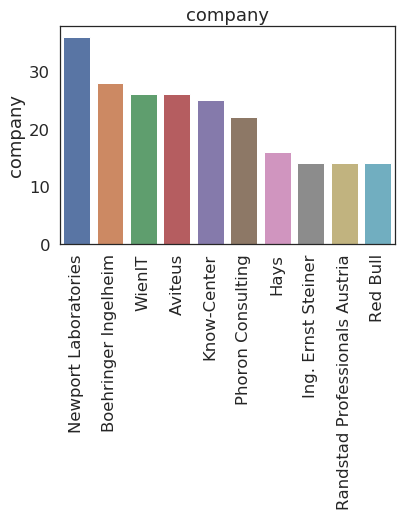

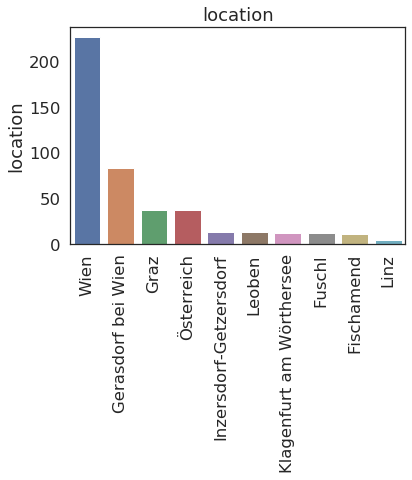

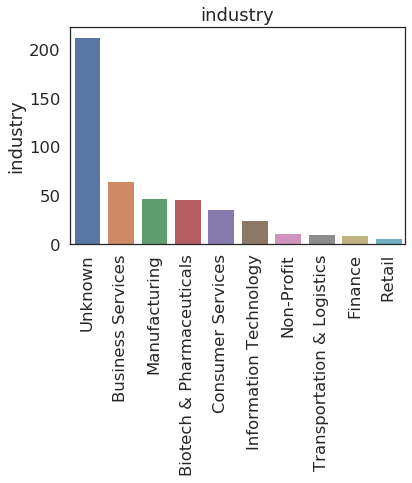

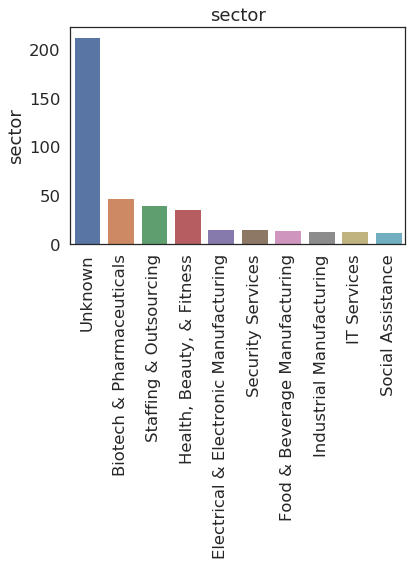

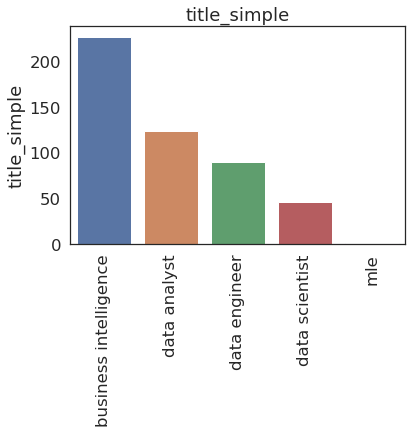

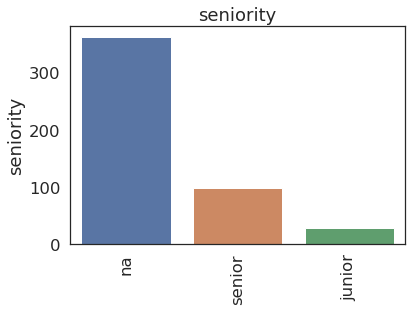

In [401]:
for c in jobs_categoric.columns:
    jobs_categoric = jobs_categoric.replace("-1", "Unknown")
    x_vals = jobs_categoric[c].value_counts().head(10).index
    y_vals = jobs_categoric[c].value_counts().head(10)
    ax = sns.barplot(x=x_vals, y=y_vals)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.title(c)
    plt.show()

### Salary depending on level of seniority

In [400]:
pd.pivot_table(jobs, index=['title_simple', 'seniority'], values='salary', aggfunc=[np.mean, 'count'])

mean  count
                                       salary salary
title_simple          seniority                     
business intelligence junior     34957.538462     13
                      na         41119.761905    126
                      senior     59047.105263     57
data analyst          junior     35923.076923     13
                      na         37174.219178     73
                      senior     35000.000000      1
data engineer         junior     38376.000000      2
                      na         43694.879310     58
                      senior     52017.280000     25
data scientist        na         43915.571429     28
                      senior     50085.090909     11
mle                   na         43680.000000      1

Not suprisingly, Seniors tend to earn more money than Juniors. Attention: Some cell counts are very small (e.g. data analysts seniors)

### Job Locations

In [277]:
pd.pivot_table(jobs, index='location', values='salary', aggfunc='count')

,salary
location,
Elsbethen,2
Feldkirchen,0
Fischamend,11
Fuschl,12
Gerasdorf bei Wien,77
Graz,36
Gumpoldskirchen,1
Gunskirchen,1
Hagenberg,3


## Analysis of job descriptions

As there are job offerings written in English as well as in German. As this is a potential factor (international vs. national company) it would be useful to be able to differenetiate between the two. 

In [278]:
jobs['language'] = jobs['job_description'].apply(detect)

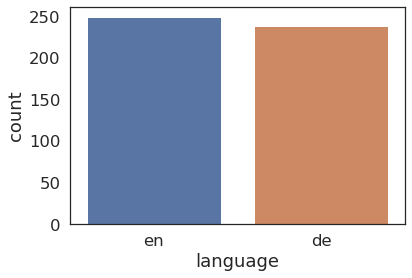

In [279]:
sns.countplot(x='language', data=jobs)

Half of the job offerings are written in English, the other half is written in German.


Are there certain types of jobs that are preferably written in English or German?

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

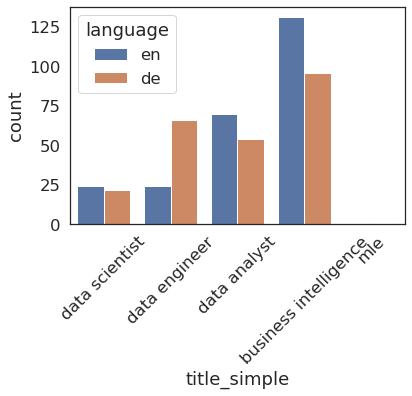

In [280]:
_ = plt.figure()

sns.countplot(x='title_simple', hue='language', data=jobs)
plt.xticks(rotation=45)

Data Engineer jobs are mostly written in German. Business intelligence, on the other hand, tend to be written in English. 

In [295]:
jobs.columns

Index(['job_title_orig', 'job_description', 'rating', 'company_name',
       'location', 'size_orig', 'founded', 'industry', 'sector',
       'revenue_orig', 'job_title', 'title_simple', 'seniority', 'salary',
       'company', 'revenue', 'size', 'python', 'sql', 'spark', 'excel',
       'tableau', 'hadoop', 'spss', 'r', 'statistics', 'company_age',
       'language'],
      dtype='object')

Hypothesis: Job offerings in English include higher salaries.

In [337]:
pd.pivot_table(index=['title_simple'], columns=['language'], values='salary', data=jobs)

language,de,en
title_simple,,
business intelligence,48063.152941,44286.981982
data analyst,40779.529412,31554.500000
data engineer,45872.661290,46407.913043
data scientist,42077.200000,49422.526316
mle,43680.000000,NaN


If there is a language effect on salaries, it seems to be rather small and ambivalent regarding job categories. To be analyzed.

Hypothesis: Bigger companies more often write English job offerings.

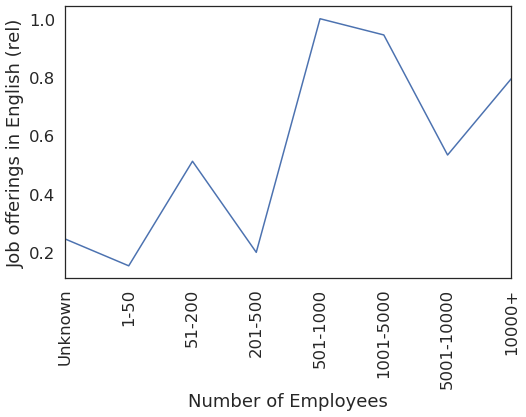

In [391]:
_, ax = plt.subplots(figsize=(8, 5))

language_counts = jobs.groupby('size')['language'].value_counts(sort=False, normalize=True)
language_counts[:, 'en'].plot()

ax.set_xticks(np.arange(8))
ax.set_xticklabels(['Unknown', '1-50', '51-200', '201-500', '501-1000', '1001-5000', '5001-10000', '10000+'],
                  rotation=90)
ax.set_xlabel('Number of Employees')
ax.set_ylabel('Job offerings in English (rel)')

plt.xlim((0,7))

plt.show()

Bigger companies indeed tend to have more job offerings in English.\
A possible explanation is that bigger companies are more likely to be international companies that need to communicate in English.

## Word Cloud

One word cloud for each language (i.e. English and German)

In [282]:
words_german = " ".join(jobs.loc[jobs['language'] == 'de', 'job_description'])
words_english = " ".join(jobs.loc[jobs['language'] == 'en', 'job_description'])

In [283]:
def punctuation_stop(text, language):
    """remove punctuation and stop words
    
    text (str): Job description text
    langauge (str): Language indicator for adaption of stopwords ('english' or 'german')
    """
    filtered = []
    stop_words = set(stopwords.words(language))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

In [284]:
words_filtered_de = punctuation_stop(words_german, language='german')
words_filtered_en = punctuation_stop(words_english, language='english')

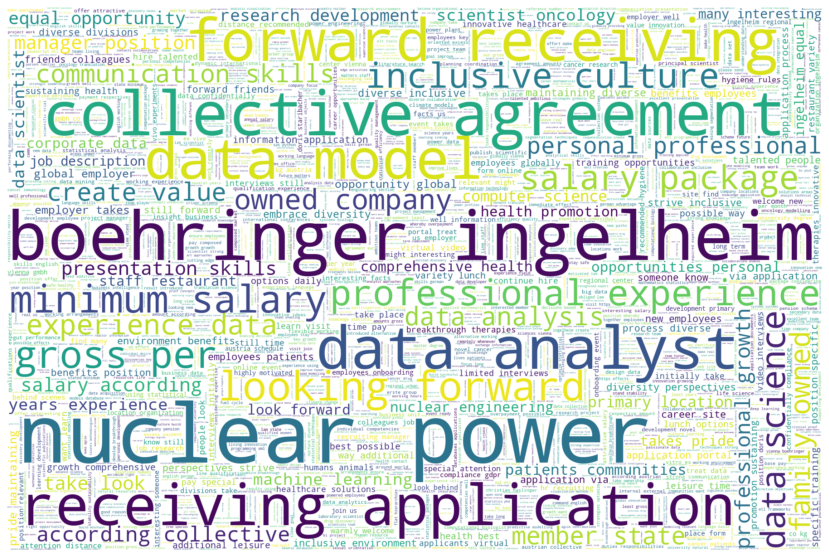

In [289]:
text_en = " ".join(ele for ele in words_filtered_en)

wc_en = WordCloud(background_color="white", random_state=1, stopwords=STOPWORDS, max_words=2000, 
                 width=1800, height=1200)
wc_en.generate(text_en)

plt.figure(figsize=(16,10))
plt.imshow(wc_en, interpolation="bilinear")
plt.axis('off')
plt.show()

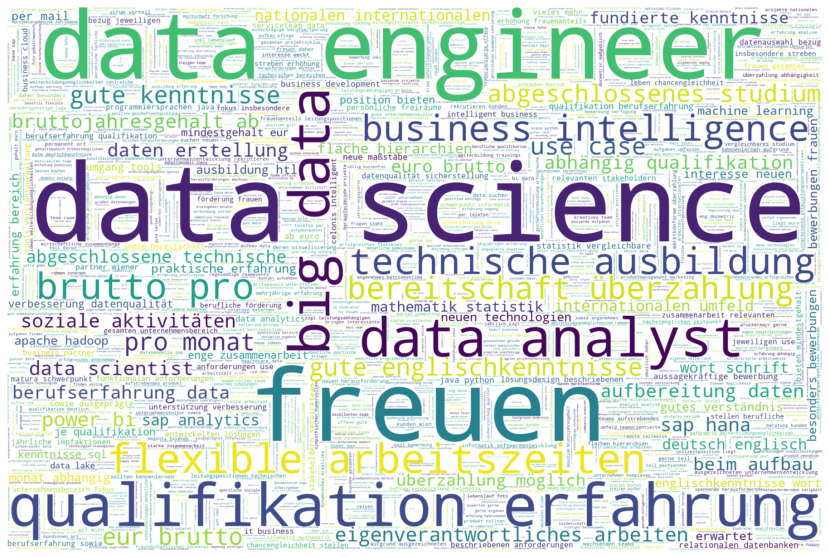

In [293]:
text_de = " ".join(ele for ele in words_filtered_de)

wc_de = WordCloud(background_color="white", random_state=1, stopwords=set(stopwords.words('german')),
                  max_words=2000, width=1800, height=1200)
wc_de.generate(text_de)

plt.figure(figsize=(16,10))
plt.imshow(wc_de, interpolation="bilinear")
plt.axis('off')
plt.show()